In [16]:
# Import
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# First task
dataset = load_wine()

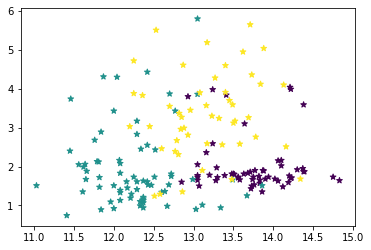

In [20]:
#Second task

#Feature 1:Alcohol
#Feature 2: Malic Acid
label_true = dataset.target
X = dataset.data[:, :2]

#Representation
plt.scatter(X[:,0], X[:,1], marker='*', c=label_true)
plt.show()


